## Lab 2 - Part 1.
 - Use a dataset of Pokemon( Pikachu and Pichu) to take user input guess if its Pikachi or Pichu.
 
    - For this task I will be using the mean position of Pikachu and Pichu
      and use Euclidian distance calculate to which "Pokemon" the new point is closest to.
    
    - For loading and preparing data I will be using basic Panda.
 

### 1. Import modules
 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Load Data

In [3]:
datapoints = pd.read_csv("datapoints.txt")
datapoints.head(), datapoints.columns

(   (width (cm)   height (cm)   label (0-pichu   1-pikachu))
 0    21.959384     31.239567                0           NaN
 1    23.635916     36.468215                1           NaN
 2    17.714056     31.441704                0           NaN
 3    21.780200     33.213398                1           NaN
 4    25.206306     36.558816                1           NaN,
 Index(['(width (cm)', ' height (cm)', ' label (0-pichu', ' 1-pikachu))'], dtype='object'))

In [4]:
# Cleaning up the columns, removing unnecessary spaces and text. 
# Dropping  "  1-pikachu))'" NaN Column. Renaming target column to Pika1/Pichu0
datapoints_new = datapoints.drop([" 1-pikachu))"], axis=1)
datapoints_new.rename(columns={"(width (cm)": "Width", " height (cm)": "Height", " label (0-pichu": "Pika1/Pichu0"}, inplace= True)
datapoints_new


,Width,Height,Pika1/Pichu0
0,21.959384,31.239567,0
1,23.635916,36.468215,1
2,17.714056,31.441704,0
3,21.780200,33.213398,1
4,25.206306,36.558816,1
...,...,...,...
145,18.990690,32.387963,0
146,23.542000,32.475193,0
147,19.640603,30.291557,0
148,21.989954,33.645903,1


In [5]:
datapoints_new.describe()
# Dataset is balanced 50/50 with Pikachu Pichu.

,Width,Height,Pika1/Pichu0
count,150.000000,150.000000,150.000000
mean,22.062142,33.598281,0.500000
std,2.497307,2.159651,0.501675
min,16.866105,28.888134,0.000000
25%,19.921975,32.005462,0.000000
50%,22.040754,33.315877,0.500000
75%,24.316733,35.320895,1.000000
max,27.194384,40.147170,1.000000


## Prepare Data

In [60]:
# Separate Pikachu and Pichu

# Only Pika
pikachu = datapoints_new[datapoints_new["Pika1/Pichu0"] == 1]

# Mean() Pikachu Position for X and Y
xpika = pikachu['Width'].mean()
ypika = pikachu['Height'].mean() 


# Only pichu
pichu = datapoints_new[datapoints_new["Pika1/Pichu0"] == 0]

# Mean() Pichu Position for X and Y
xpichu = pichu['Width'].mean()
ypichu = pichu['Height'].mean() 


# ------------ data frame for test points, for plotting later -------------

data_test_points = [[25, 32, 1], [24.2, 31.5, 1], [22, 34, 1], [20.5, 34, 0], [xpika, ypika, 2], [xpichu, ypichu, 2]]
  # Create pandas DataFrame
testpoints = pd.DataFrame(data_test_points, columns=["Width", "Height", "Pika1/Pichu0"])
testpoints

#---------------------------------------------------------------------------------------

,Width,Height,Pika1/Pichu0
0,25.000000,32.000000,1
1,24.200000,31.500000,1
2,22.000000,34.000000,1
3,20.500000,34.000000,0
4,24.091910,35.248236,2
5,20.032374,31.948326,2


## Visualize the data

## Algoritm using the Euclidian distance

In [24]:
# Will prompt the user for X (width) and then Y(height)
import math

result = []
while True:
    try:
        user_x = float(input("Type width(x): "))
        user_y = float(input("Type in height(y): "))
        break
    except ValueError:
        print("Use only numbers with or without decimals.")
        break


a = (xpika-user_x)**2 + (ypika-user_y)**2
distpika = math.sqrt(a)

b = (xpichu-user_x)**2 + (ypichu-user_y)**2
distpichu = math.sqrt(b)

if distpika > distpichu:
    print(f"Width: {user_x} and Height: {user_y}. Pichu!")
        
else:
    print(f"Width: {user_x} and Height: {user_y}. Pikachu!")
        

#Test points:
#1. (25, 32) should be pika
#2. (24.2, 31.5) - pika
#3. (22, 34) - pika
#4. (20.5, 34) - pichu



Width: 20.5 and Height: 34.0. This is Pichu!


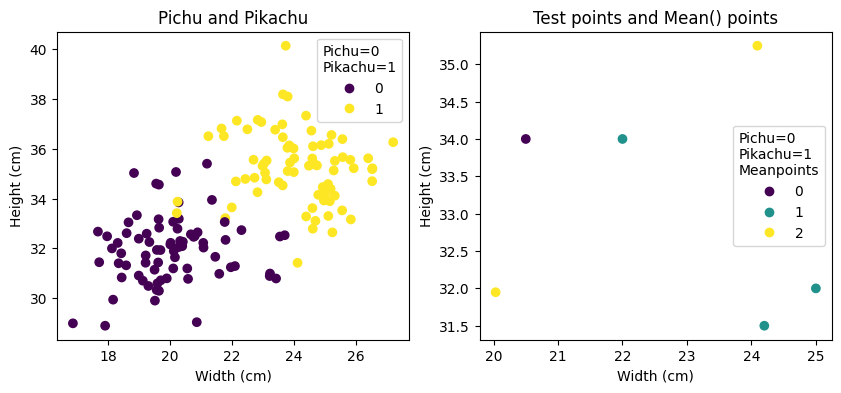

In [62]:
# Create the plot with subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# ---------- first ax1 plot -------------
scatter1 = ax1.scatter(datapoints_new["Width"], 
                     datapoints_new["Height"], 
                     c=datapoints_new["Pika1/Pichu0"])

# ax1 Customization
ax1.set(title="Pichu and Pikachu",
       xlabel="Width (cm)",
       ylabel="Height (cm)")
ax1.legend(*scatter1.legend_elements(), title="Pichu=0\nPikachu=1")


# --------- second ax2 plot ------------------
scatter2 = ax2.scatter(testpoints["Width"], #  testpoints is the dataset we prepared earlier.
                     testpoints["Height"], 
                     c=testpoints["Pika1/Pichu0"])

# ax2 Customization
ax2.set(title="Test points and Mean() points",
       xlabel="Width (cm)",
       ylabel="Height (cm)")
ax2.legend(*scatter2.legend_elements(), title="Pichu=0\nPikachu=1\nMeanpoints");

### * Potential Problems 

## Lab 2 - Part 2:
K-nearest 